In [36]:
# 引入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS系统字体
plt.rcParams['axes.unicode_minus'] = False

#### 加载数据

In [37]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
print(df.columns)
df.head()

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#### 查看缺失值

In [38]:
# 方法1：找每列空值的数量
df.isnull().sum()

# # 方法2：用missingno库进行可视化查看
# import missingno as msno
# # 绘制矩阵图，直观展示缺失值分布
# msno.matrix(df)
# plt.show()
# # 绘制柱状图，展示每列的缺失值数量
# msno.bar(df)
# plt.show()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

####  填充缺失值

In [39]:
# 方法1：均值填充（适用于数值型数据，尤其当数据分布较为均匀，没有明显的异常值时）
df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].mean(),2))
# 方法2：中位数填充（适用于存在异常值的数值型数据，减少影响）
# df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].median(),2))
# 方法3：众数填充（更适用于类别型数据，这里是数值型）
# df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].mode()[0],2))
# 方法4：前向填充（使用前一个非缺失值来填充当前的缺失值，常用于时间序列数据，即数据不会剧烈变化）
# df['Arrival Delay'].fillna(method='ffill', inplace=True)
# 方法5：后向填充
# df['Arrival Delay'].fillna(method='bfill', inplace=True)
# 方法6：回归填充
# 方法7：多重插补法

# 检验是否填充
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

#### 查看重复值

In [40]:
df.duplicated().sum()

np.int64(0)

#### 查看数据规模和信息

In [41]:
df.shape

(129880, 24)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

#### 探索性分析——乘客基本情况(年龄、性别等）

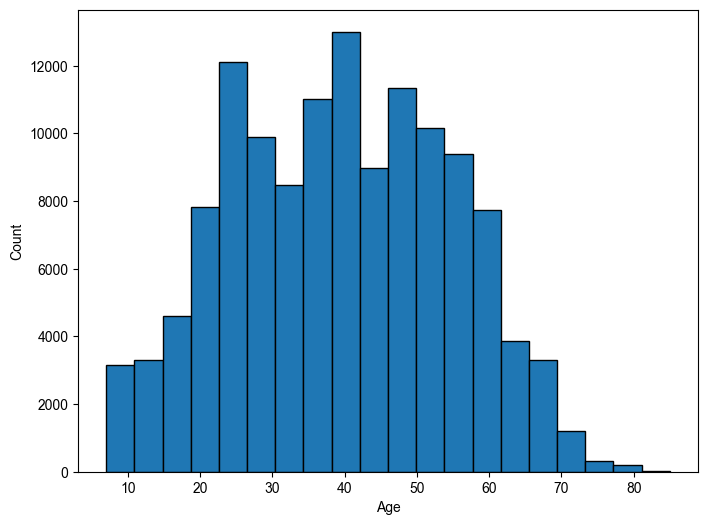

In [43]:
# 乘客年龄分布图
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### 探索性分析——客户满意度整体分布情况

In [44]:
dist = df['Satisfaction'].value_counts()

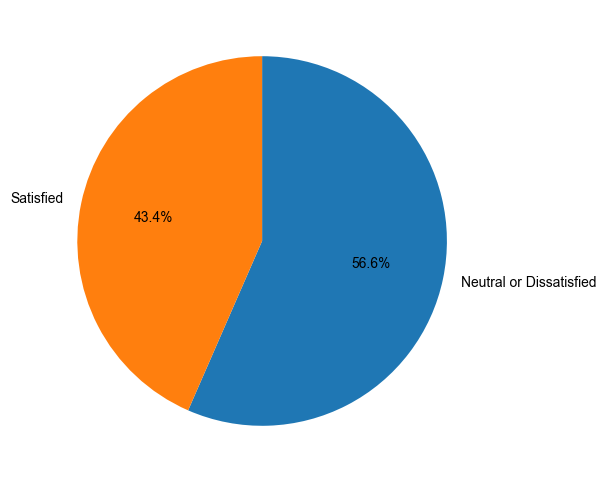

In [45]:
fig = plt.figure(figsize=(6,6))
plt.pie(dist.values, 
        labels=dist.index, 
        autopct='%1.1f%%', 
        counterclock=False, 
        startangle=90,
        )
plt.show()
#整体来看乘客满意度，仅有43.4%的乘客觉得满意，56.6%的乘客持中立或不满意态度。

#### 探索性分析——具体服务指标客户满意度分布情况


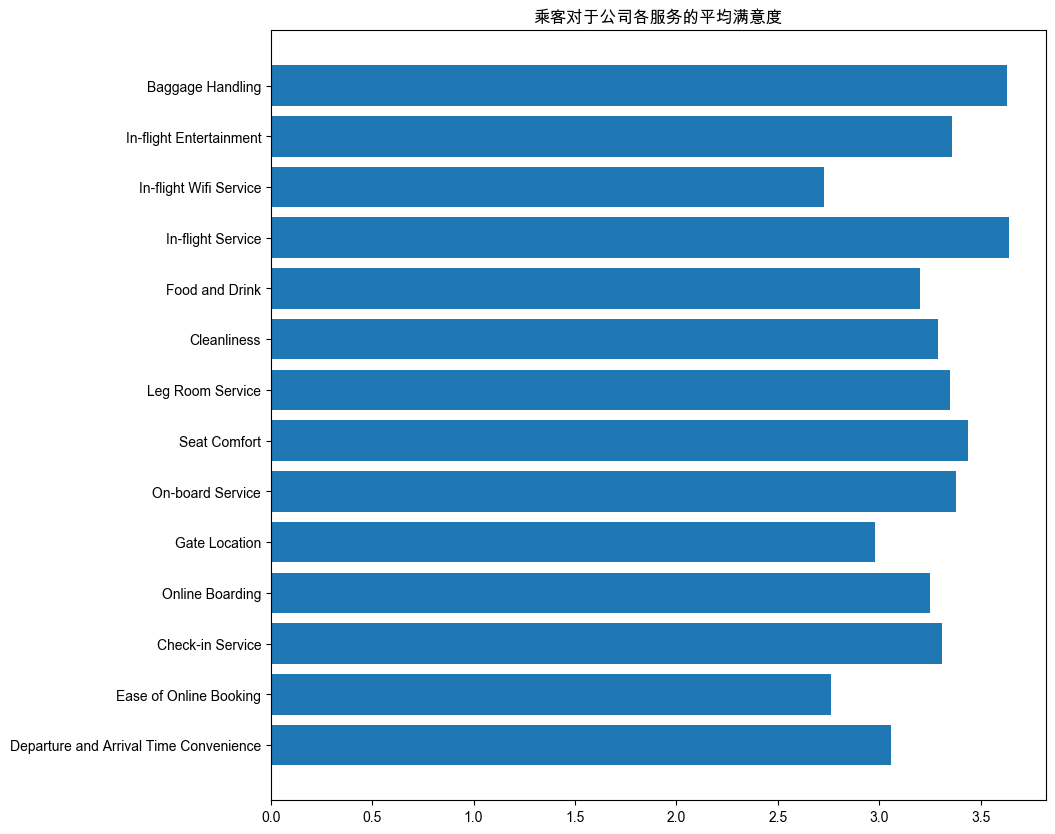

In [46]:
data = df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]
score = round(data.mean(),2)
x_label = score.index
y_label = score.values
fig = plt.figure(figsize=(10,10))
plt.barh(x_label, y_label)
plt.title('乘客对于公司各服务的平均满意度')
plt.show()

#### 探索性分析——不同特征客户的满意度分布（性别、年龄、飞行距离等）

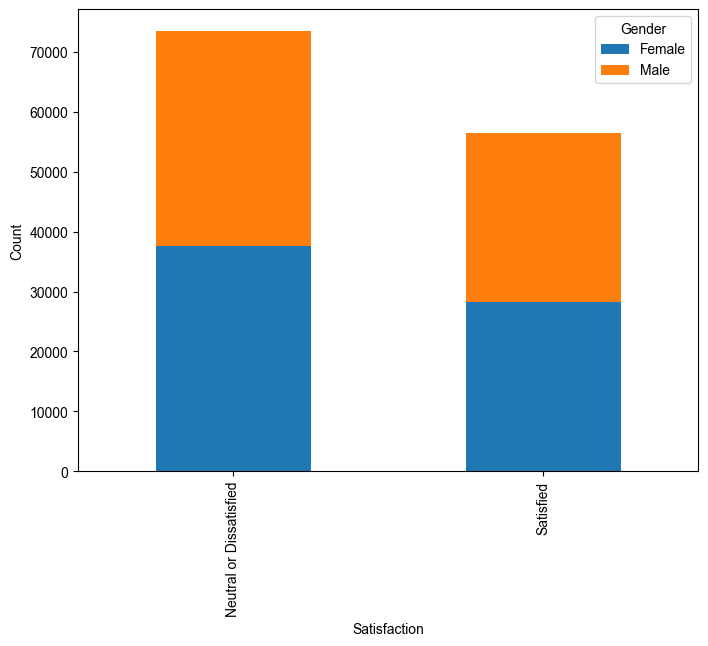

In [47]:
# 性别
satisfaction_gender = df.groupby(['Satisfaction', 'Gender'])['Gender'].count().unstack()  # 统计每个满意度下的性别分布
ax = satisfaction_gender.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

#### 特征工程

/var/folders/sd/th5kxjnn1c79g4cg_rc6gl480000gn/T/ipykernel_21960/2483106964.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Middle-aged', 'Adult', 'Middle-aged', 'Middle-aged', 'Middle-aged', ..., 'Adult', 'Middle-aged', 'Middle-aged', 'Middle-aged', 'Young']
Length: 129880
Categories (4, object): ['Young' < 'Adult' < 'Middle-aged' < 'Senior']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster_features.loc[:,'Age'] = pd.Categorical(
/var/folders/sd/th5kxjnn1c79g4cg_rc6gl480000gn/T/ipykernel_21960/2483106964.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['短途', '短途', '短途', '中途', '超长途', ..., '超短途', '超短途', '超短途', '超短途', '超短途']
Length: 129880
Categories (5, object): ['超短途' < '短途' < '中途' < '长途' < '超长途']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


类别型特征编码对应关系：

特征:Age
  Young -> 0
  Adult -> 1
  Middle-aged -> 2
  Senior -> 3

特征:Gender
  Female -> 0
  Male -> 1

特征:Customer Type
  First-time -> 0
  Returning -> 1

特征:Type of Travel
  Business -> 0
  Personal -> 1

特征:Class
  Business -> 0
  Economy -> 1
  Economy Plus -> 2

特征:Flight Distance
  超短途 -> 0
  短途 -> 1
  中途 -> 2
  长途 -> 3
  超长途 -> 4

特征:Satisfaction
  Neutral or Dissatisfied -> 0
  Satisfied -> 1


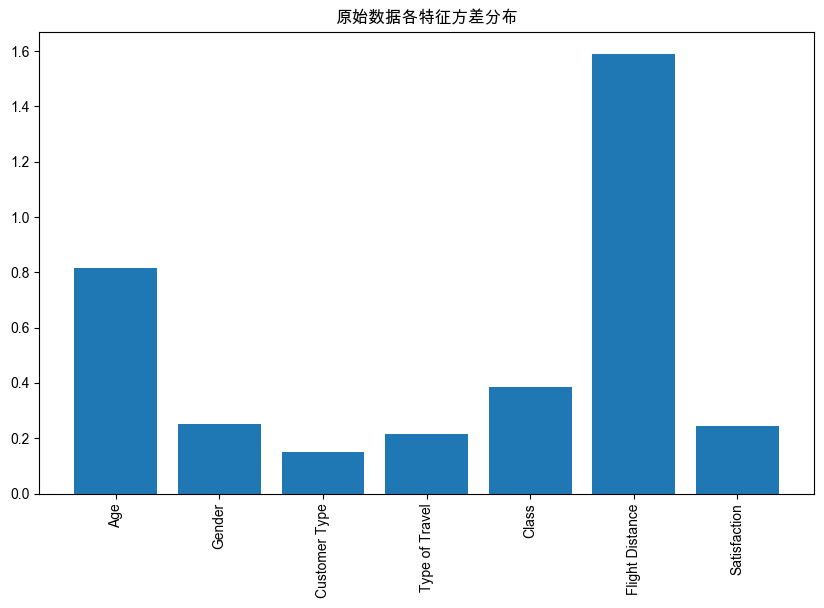

In [48]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 0. 定义用于聚类的特征
cluster_features = df[[
    'Age', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
    'Flight Distance','Satisfaction'
]]

# 添加分箱特征时指定顺序
cluster_features.loc[:,'Age'] = pd.Categorical(
    pd.cut(cluster_features['Age'],
           bins=[0, 25, 40, 60, 100],
           labels=['Young', 'Adult', 'Middle-aged', 'Senior']),
    categories=['Young', 'Adult', 'Middle-aged', 'Senior'],
    ordered=True
)

# 对Flight Distance进行分箱时指定顺序
cluster_features.loc[:,'Flight Distance'] = pd.Categorical(
    pd.cut(cluster_features['Flight Distance'],
           bins=[0, 500, 1000, 2000, 3000, float('inf')],
           labels=['超短途', '短途', '中途', '长途', '超长途']),
    categories=['超短途', '短途', '中途', '长途', '超长途'],
    ordered=True
)


# 对类别型特征进行编码
categorical_features = ['Age','Gender', 'Customer Type', 'Type of Travel', 'Class','Flight Distance', 'Satisfaction']

label_encoders = {}

# 定义每个特征的顺序
category_orders = {
    'Age': ['Young', 'Adult', 'Middle-aged', 'Senior'],
    'Flight Distance': ['超短途', '短途', '中途', '长途', '超长途']
}

for feature in categorical_features:
    if feature in category_orders:
        # 使用自定义顺序编码
        cluster_features.loc[:, feature], _ = pd.factorize(
            cluster_features[feature],
            sort=True  # 按照Categorical的顺序编码
        )
        # 添加映射信息到label_encoders
        label_encoders[feature] = dict(zip(category_orders[feature], range(len(category_orders[feature]))))
    else:
        # 其他特征使用LabelEncoder
        le = LabelEncoder()
        cluster_features.loc[:, feature] = le.fit_transform(cluster_features[feature])
        label_encoders[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# 打印编码映射信息
print("类别型特征编码对应关系：")
for feature, mapping in label_encoders.items():
    print(f"\n特征:{feature}")
    for label, encoded_value in mapping.items():
        print(f"  {label} -> {encoded_value}")

# 2. 计算原始数据的方差并绘制分布图
variances_raw = cluster_features.var()
plt.figure(figsize=(10, 6))
plt.bar(range(len(variances_raw)), variances_raw)
plt.xticks(range(len(variances_raw)), cluster_features.columns, rotation=90)
plt.title('原始数据各特征方差分布')
plt.show()

In [49]:
# # 3.先检查Flight Distance的分布
# plt.figure(figsize=(10, 6))
# plt.hist(cluster_features['Flight Distance'], bins=50)
# plt.title('Flight Distance 原始分布')
# plt.show()

# # 如果数据存在极端值或右偏分布，先进行对数变换

# # 如果数据在极端值或右偏分布，先进行对数变换
# if cluster_features['Flight Distance'].skew() > 1:  # 偏度大于1表示明显右偏
#     # Convert to float before applying log transformation
#     cluster_features.loc[:,'Flight Distance'] = cluster_features['Flight Distance'].astype(float)
#     cluster_features.loc[:,'Flight Distance'] = np.log1p(cluster_features['Flight Distance'])

# # 再次检查Flight Distance的分布
# plt.figure(figsize=(10, 6))
# plt.hist(cluster_features['Flight Distance'], bins=50)
# plt.title('Flight Distance 原始分布')
# plt.show()

# # 计算新数据的方差并绘制分布图
# variances_raw = cluster_features.var()
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(variances_raw)), variances_raw)
# plt.xticks(range(len(variances_raw)), cluster_features.columns, rotation=90)
# plt.title('原始数据各特征方差分布')
# plt.show()

In [50]:
# # 5. 数据标准化
# from sklearn.preprocessing import StandardScaler

# # 定义需要标准化的数值型特征
# numeric_features = cluster_features.select_dtypes(include=['float64', 'int64']).columns
# # 排除类别型特征
# numeric_features = numeric_features.difference(['Age', 'Gender', 'Customer Type','Type of Travel','Class'])  # 添加其他需要排除的类别型特征

# # 仅对数值型特征进行标准化
# scaler = StandardScaler()
# cluster_features_scaled = cluster_features.copy()
# cluster_features_scaled[numeric_features] = scaler.fit_transform(cluster_features[numeric_features])

# # 查看标准化后的特征值
# print(cluster_features_scaled.head(10))
# # 检查类别型特征是否保持不变
# print(cluster_features_scaled[['Gender', 'Customer Type','Type of Travel','Class']].value_counts())

# # 6. 基于方差阈值的特征选择
# ## 计算各特征的方差
# variances = cluster_features_scaled.var()

# # 绘制各特征方差分布图
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(variances)), variances)
# plt.xticks(range(len(variances)), cluster_features_scaled.columns, rotation=90)
# plt.title('标准化后各特征方差分布')
# plt.show()

#### 选择最优的k值

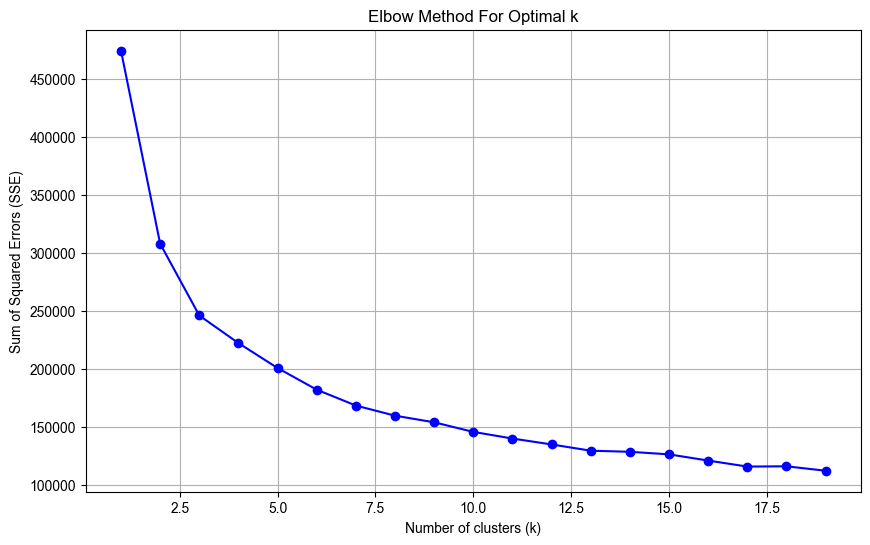

In [51]:
from sklearn.cluster import KMeans

# 计算不同K值的SSE
sse = []
k_range = range(1, 20)  # 将最大聚类数减少到20
for k in k_range:
    kmeans = KMeans(n_clusters=k, 
                   random_state=42,
                   init='k-means++',  # 使用更好的初始化方法
                   max_iter=300,      # 增加最大迭代次数
                   n_init=10)         # 增加初始化次数
    kmeans.fit(cluster_features)
    sse.append(kmeans.inertia_)

# 绘制肘部法曲线
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

#### Kmeans聚类

In [52]:
# 8.对客户特征进行kmeans聚类

# 假设最优n_cluster为k
optimal_k = 6 # 根据肘部法则确定的最优k值

# 进行KMeans聚类
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_features)

# 将聚类结果添加到原始数据中
cluster_features['Cluster'] = cluster_labels

/var/folders/sd/th5kxjnn1c79g4cg_rc6gl480000gn/T/ipykernel_21960/1474767915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features['Cluster'] = cluster_labels


#### 聚类结果分析

各聚类样本数量：
Cluster
0    18010
1    36268
2    19513
3    14904
4    26986
5    14199
Name: count, dtype: int64


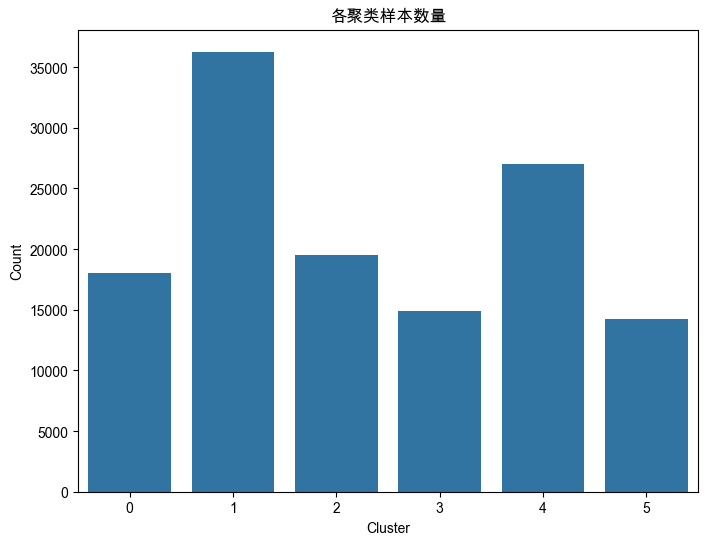

In [53]:
import seaborn as sns
# 添加聚类大小分析
cluster_sizes = cluster_features['Cluster'].value_counts().sort_index()
print("各聚类样本数量：")
print(cluster_sizes)

# 可视化聚类大小
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('各聚类样本数量')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

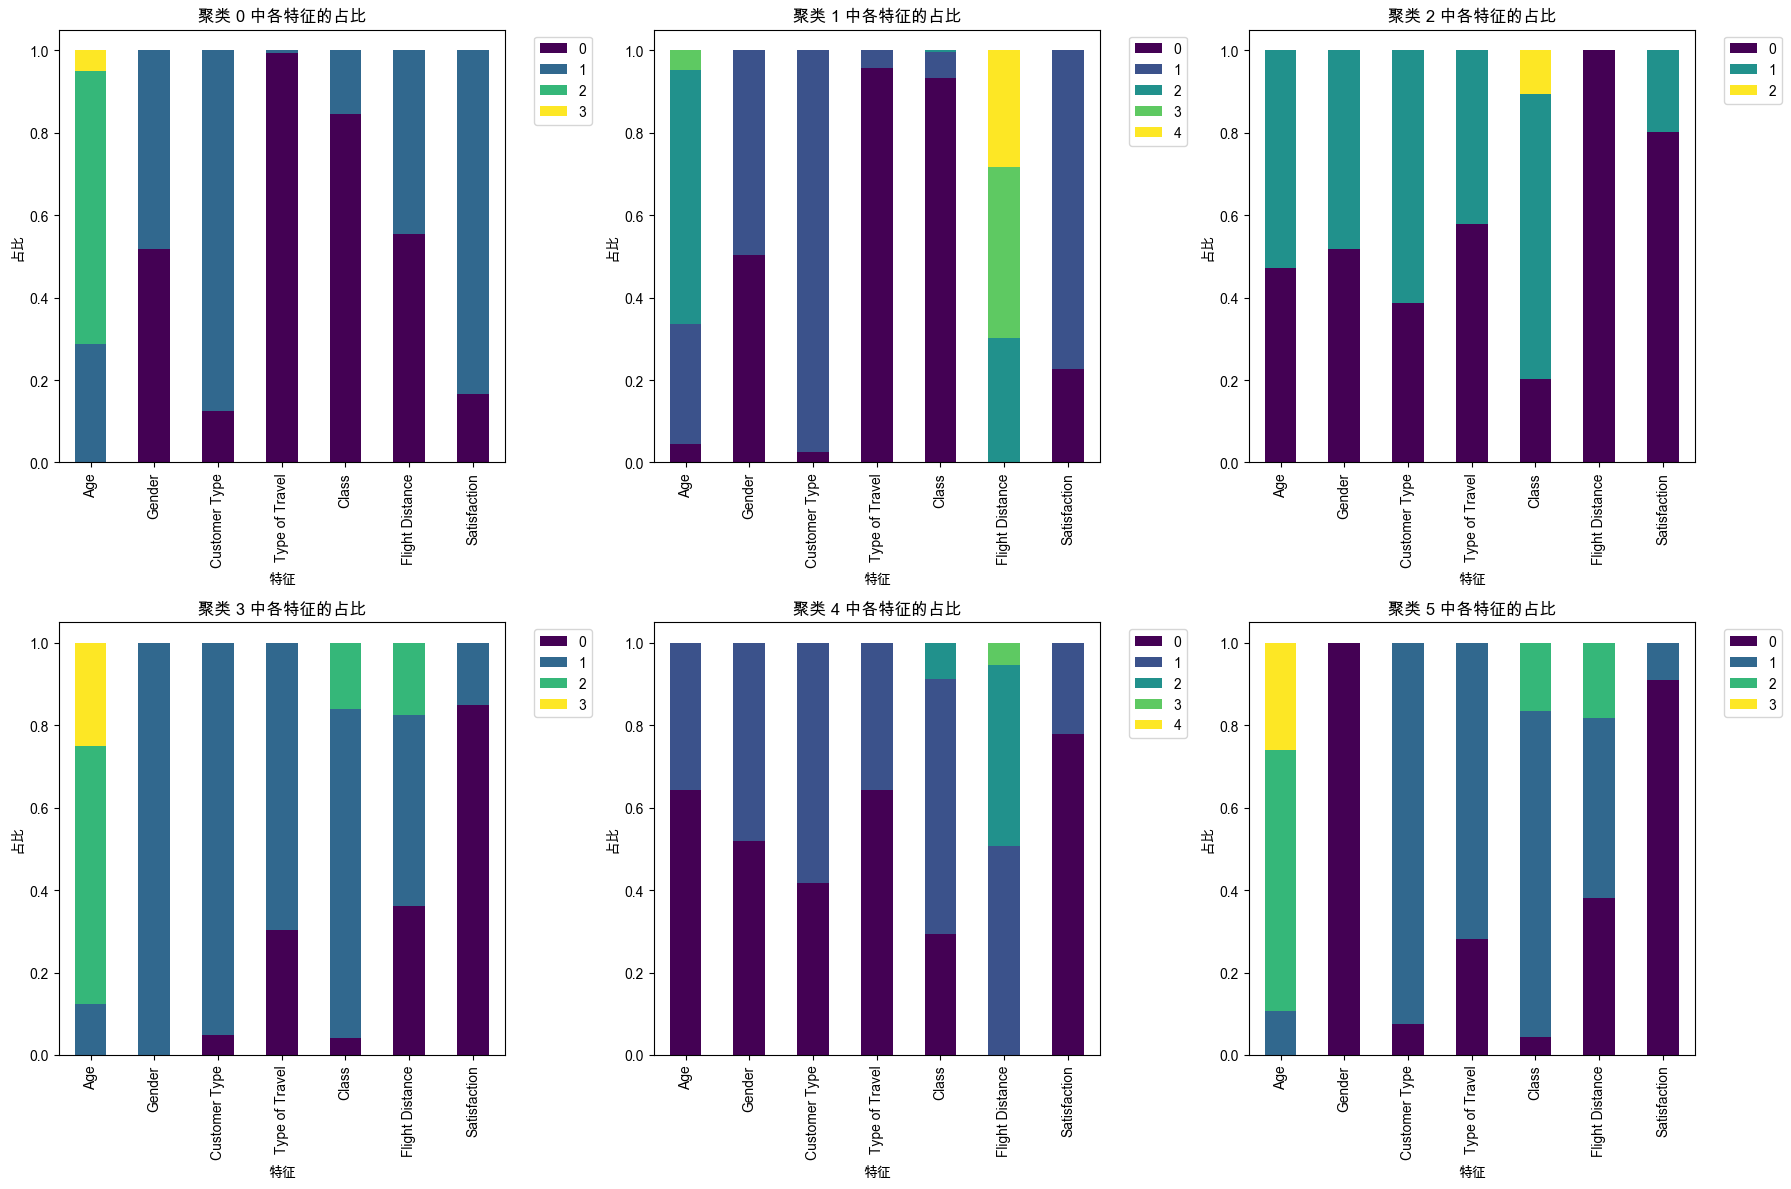

In [54]:
# 绘制每个聚类的特征占比图
import matplotlib.pyplot as plt

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, cluster in enumerate(sorted(cluster_features['Cluster'].unique())):
    # 获取当前聚类的数据
    cluster_data = cluster_features[cluster_features['Cluster'] == cluster]
    
    # 选择要分析的特征
    features_to_analyze = ['Age', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Satisfaction']
    
    # 计算当前聚类中各特征的占比
    feature_counts = cluster_data[features_to_analyze].apply(lambda x: x.value_counts(normalize=True))
    
    # 绘制堆叠柱状图
    feature_counts.T.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'聚类 {cluster} 中各特征的占比')
    axes[i].set_ylabel('占比')
    axes[i].set_xlabel('特征')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

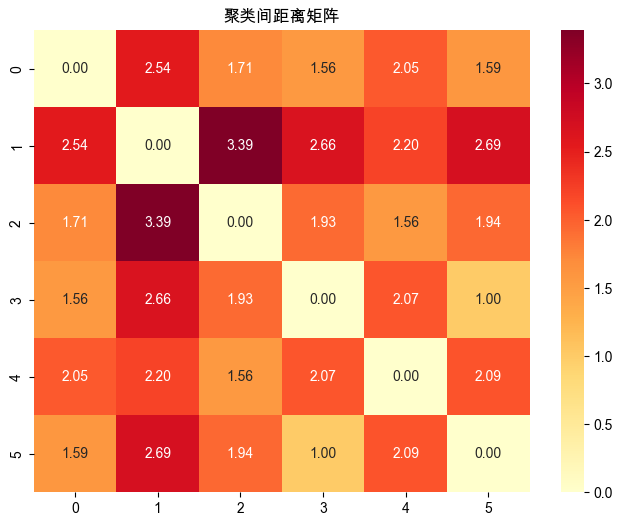

In [55]:
from scipy.spatial.distance import pdist, squareform

# 计算聚类间距离
cluster_distances = squareform(pdist(kmeans.cluster_centers_))

# 可视化聚类间距离
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_distances, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('聚类间距离矩阵')
plt.show()


In [56]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 计算评估指标
silhouette_avg = silhouette_score(cluster_features.iloc[:, :-1], cluster_features['Cluster'])
calinski_harabasz = calinski_harabasz_score(cluster_features.iloc[:, :-1], cluster_features['Cluster'])

print(f"轮廓系数：{silhouette_avg:.3f}")
print(f"Calinski-Harabasz指数：{calinski_harabasz:.1f}")


轮廓系数：0.230
Calinski-Harabasz指数：36750.7
